# Modular Burgers Test v2

In this notebook, we will be testing the modular Burger's equation solver.


In [1]:
import sys, os
neural_dir = r"C:\neuralOperator\solvers"
sys.path.append(neural_dir)
from solvers import *

import numpy as np
import matplotlib.pyplot as plt


solvers file:	c:\neuralOperator\solvers\solvers.py
Library directory:	C:\neuralOperator\solvers\lib
Before import from distributedFunctions
After import from distributedFunctions


## Introduction

Part of our neural operator project was producing a modular solver that does not inherently require the standard or Euclidean spatial discretization to operate. Thus, I will be working through a Burger's equation problem to show how the new solver works.


## Problem Setup

To set up the problem, we will have an x-domain from [-1, 1] with a dual-sine initialized state.


In [2]:
N_x = 1000
x_domain = np.linspace(-1, 1, N_x)


In [3]:
u_0 = np.sin( 2* np.pi * x_domain ) - 2 * np.sin( np.pi * x_domain )


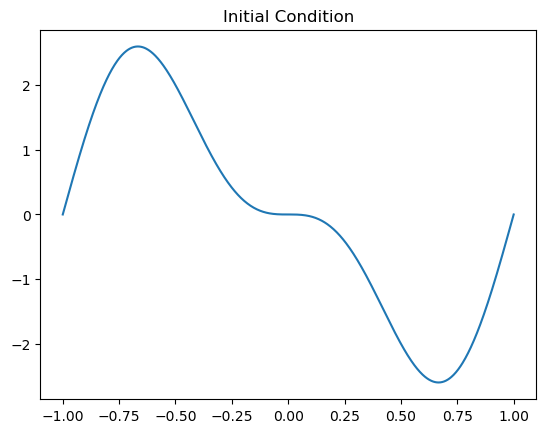

In [4]:
plt.plot( x_domain, u_0 )

plt.title("Initial Condition")
plt.show()


# Burger's Equation Object

Part of how the solver is set up is to let the Burger's equation as an object. We initialize it and then we can call it, which allows the time stepping object to use an object specific to a problem.


In [5]:
burgers_test = burgers_eqn( viscid=False )


Spatial order is 2
 
 
 
 
 
 
 
 
 


In [6]:
BC_set = ( ["periodic", "periodic"], [None, None], [None, None] )


In [7]:
du_dt_0 = burgers_test( x_domain, u_0, [0] , BC_set)


c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_index.py:155: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_base.py:1068: SparseEfficiencyWarning: Constructing a DIA matrix with 1999 diagonals is inefficient
  return self.tocoo(copy=copy).todia(copy=False)


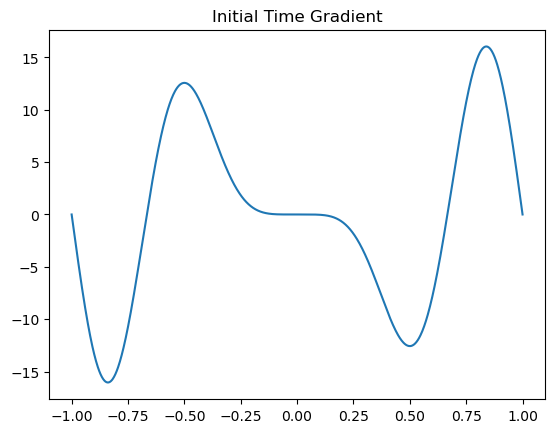

In [8]:
plt.plot( x_domain, du_dt_0 )

plt.title("Initial Time Gradient")
plt.show()


And this looks right for the initial condition we have.


## Time Stepping

Now, we can introduce our equation object to the time stepping object.


In [12]:
stepper_test = explicitEuler( burgers_test, x_domain, u_0, (0, 0.1), 100e-6, [0], BC_set, C=0.5 )


In [13]:
stepper_test.solve()


Time: 0
	Maximum Courant Number: 0.12977262415437857
Checking Courant Number
Time: 0.0001
	Maximum Courant Number: 0.1297732888922642
Checking Courant Number
Time: 0.0002
	Maximum Courant Number: 0.1297737810729038
Checking Courant Number
Time: 0.00030000000000000003
	Maximum Courant Number: 0.12977410060628788
Checking Courant Number
Time: 0.0004
	Maximum Courant Number: 0.12977424740549903
Checking Courant Number
Time: 0.0005
	Maximum Courant Number: 0.1297742213867181
Checking Courant Number
Time: 0.0006000000000000001
	Maximum Courant Number: 0.12977402246922987
Checking Courant Number
Time: 0.0007000000000000001
	Maximum Courant Number: 0.129773650575429
Checking Courant Number
Time: 0.0008000000000000001
	Maximum Courant Number: 0.12977349615481049
Checking Courant Number
Time: 0.0009000000000000002
	Maximum Courant Number: 0.12977411061650543
Checking Courant Number
Time: 0.0010000000000000002
	Maximum Courant Number: 0.1297745524671329
Checking Courant Number
Time: 0.0011000000

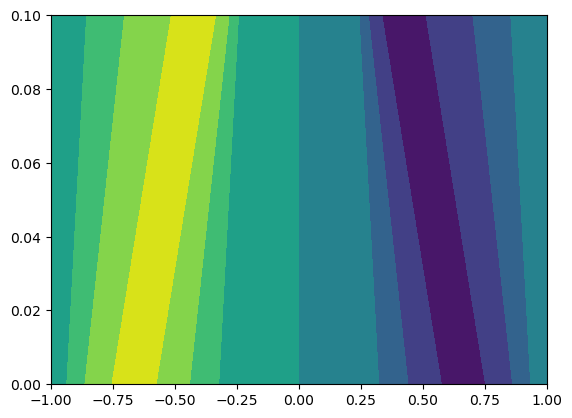

In [14]:
plt.contourf( x_domain, stepper_test.t, stepper_test.u )


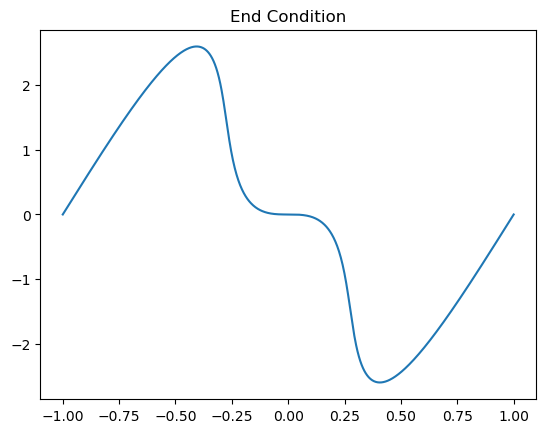

In [15]:
plt.plot( x_domain, stepper_test.u[-1] )

plt.title("End Condition")
plt.show()
